<a href="https://colab.research.google.com/github/Pat271247/242-2567-820/blob/main/6621655266_K_mean_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ค่าเฉลี่ยของแต่ละตลัสเตอร์: 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
cluster,,,,,
0,5.901613,2.748387,4.393548,1.433871,1.225806
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.850000,3.073684,5.742105,2.071053,1.947368


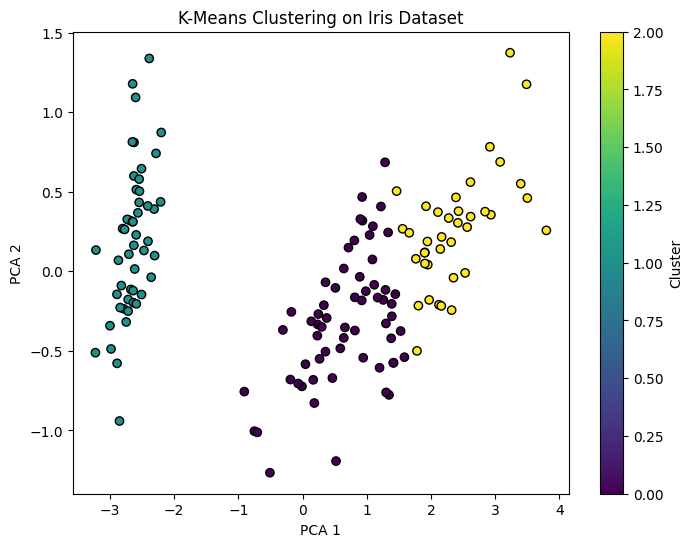

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = datasets.load_iris()
x = iris.data
y = iris.target

df = pd.DataFrame(x, columns=iris.feature_names)
df['target'] = y

kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)
df['cluster'] = kmeans.fit_predict(x) # Changed X to x

cluster_means = df.groupby('cluster').mean()
print('ค่าเฉลี่ยของแต่ละตลัสเตอร์: ')
display(cluster_means)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['cluster'], cmap='viridis',edgecolors='k')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

new_data = np.array([[5.5, 2.6, 4.4, 1.2],
                     [1.0,2.0,3.0,4.0]])

In [ ]:
df.groupby('cluster')['target'].value_counts()

cluster  target
0        1         48
         2         14
1        0         50
2        2         36
         1          2
Name: count, dtype: int64

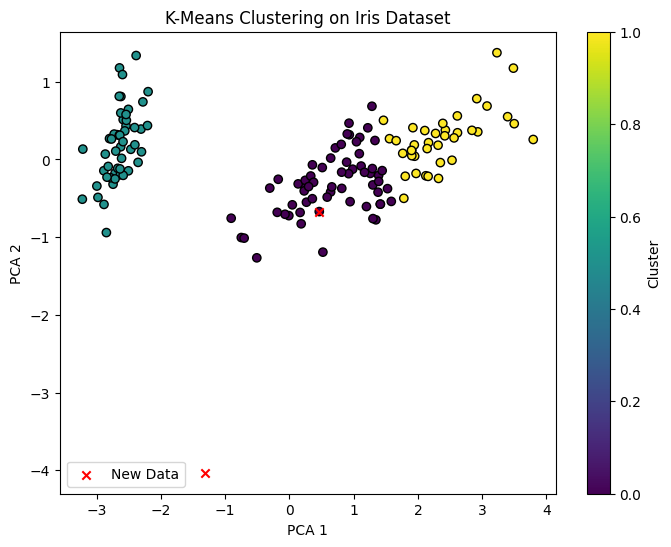

In [ ]:
#ลดมิติของข้อมูลด้วย PCA
new_data_pca = pca.transform(new_data)  # Changed 'transfrom' to 'transform'
#วาดกราฟ K-Means clustering
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['cluster'], cmap='viridis',edgecolors='k')
plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], c='red', marker='x', label='New Data')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()